In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

%matplotlib inline

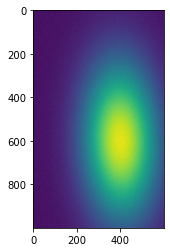

In [2]:
data=np.load('/Users/chiaentsai/Desktop/lab/bigaussian.npy')

ynum,xnum=data.shape
xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))

fig1=plt.imshow(data)

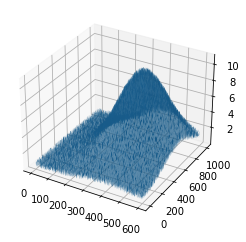

In [3]:
fig2=plt.gca(projection='3d')
fig2.plot_surface(xaxis,yaxis,data)

# fit 1D Gaussian

equation on x axis : 10.74593569461319*exp(-(x-398.6337254541954)**2/-190.82131969831642**2)
peak : 10.74593569461319
equation on y axis : 10.822813272329844*exp(-(x-598.1505652312655)**2/388.6250833607021**2)
peak : 10.822813272329844


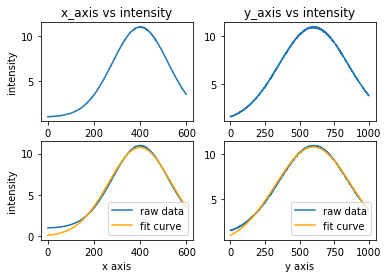

In [36]:
y_data=np.max(data,1)
x_data=np.max(data,0)
plt.subplot(2,2,1)
plt.plot(x_data)
plt.title('x_axis vs intensity')
plt.xlabel('x axis')
plt.ylabel('intensity')

plt.subplot(2,2,2)
plt.plot(y_data)
plt.title('y_axis vs intensity')
plt.xlabel('y axis')


def gauss(x, a, b, c):
    return a*np.exp(-(x-b)**2/c**2)

x1daxis=range(xnum)
y1daxis=range(ynum)

xabc, xpara = curve_fit(gauss,x1daxis,x_data)
yabc, ypara = curve_fit(gauss,y1daxis,y_data)

xfitValue = gauss(x1daxis,xabc[0],xabc[1],xabc[2])
yfitValue = gauss(y1daxis,yabc[0],yabc[1],yabc[2])

plt.subplot(2,2,3)
plt.plot(x1daxis,x_data)
plt.plot(x1daxis,xfitValue,color="orange")
plt.xlabel('x axis')
plt.ylabel('intensity')
plt.legend(['raw data','fit curve'],loc=4
          )
print('equation on x axis : '+f'{xabc[0]}*exp(-(x-{xabc[1]})**2/{xabc[2]}**2)')
print('peak :',xabc[0])

plt.subplot(2,2,4)
plt.plot(y1daxis,y_data)
plt.plot(y1daxis,yfitValue,color="orange")
plt.xlabel('y axis')
plt.legend(['raw data','fit curve'],loc=4)
print('equation on y axis : '+f'{yabc[0]}*exp(-(x-{yabc[1]})**2/{yabc[2]}**2)')
print('peak :',yabc[0])

# fit 2D Gaussian

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
%matplotlib inline


data=np.load('/Users/chiaentsai/Desktop/lab/bigaussian.npy')
ynum,xnum=data.shape
xaxis,yaxis = np.meshgrid(range(xnum),range(ynum))


def gauss2d(data_tuple, amp, x0, y0, a, b):
    
    (x,y) = data_tuple    
    inner = ((x-x0)**2)/(2*a**2)+((y-y0)**2)/(2*b**2)
    inner=-inner
    g=amp*np.exp(inner)
    return g

xdata = np.vstack((xaxis.ravel(),yaxis.ravel()))
ydata = data.ravel()

pred_params, uncert_cov = curve_fit(gauss2d,xdata,ydata,maxfev=5000)

fitvalue=gauss2d((xaxis,yaxis), pred_params[0], pred_params[1], pred_params[2], pred_params[3], pred_params[4])


Text(0.5, 0.92, 'raw data')

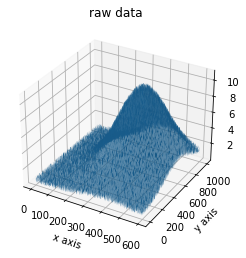

In [32]:
fig2=plt.gca(projection='3d')
fig2.plot_surface(xaxis,yaxis,data)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('raw data')

equation : 10.197972247844488*exp(-(x-398.88470719447514)**2/(2*130.02232430069196**2)-((y-598.3155732660395)**2)/(2*(267.6400402714223)**2) 

peak : 10.197972247844488


Text(0.5, 0.92, 'fit curve')

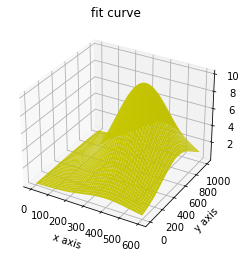

In [34]:
fig3=plt.gca(projection='3d')
fig3.plot_surface(xaxis,yaxis,fitvalue,color="yellow")
print('equation : '+f'{pred_params[0]}*exp(-(x-{pred_params[1]})**2/(2*{pred_params[3]}**2)-((y-{pred_params[2]})**2)/(2*({pred_params[4]})**2)','\n')
print('peak :',pred_params[0])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('fit curve')